# Project 2: Lee, Yueh, Friar -- Political Ads Data Cleaning

In [1]:
# Starting with import statements, and reading in .csv file

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ads_df = pd.read_csv('political_tv_ad_archive_entire_dataset.csv')

In [3]:
# Looking at the data

pd.set_option('display.max_columns', None)
print(len(ads_df))
ads_df.head(10)

375350


,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
5,6,5643,WTVT,"Tampa-St. Petersburg, FL",TMZ Live,not news,2016-08-30 19:55:14 UTC,2016-08-30 19:55:44 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
6,7,5643,WTOG,"Tampa-St. Petersburg, FL",Justice for All With Cristina Perez,not news,2016-08-30 13:22:30 UTC,2016-08-30 13:23:00 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
7,8,5643,WLFL,"Raleigh-Durham-Fayetteville, NC",The Flash,not news,2016-09-07 00:45:00 UTC,2016-09-07 00:45:30 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
8,9,5643,WOIO,"Cleveland, Ohio",Cleveland 19 News at 6PM,news,2016-08-30 22:12:59 UTC,2016-08-30 22:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
9,10,5643,WRAL,"Raleigh-Durham-Fayetteville, NC",Last Call With Carson Daly,not news,2016-08-30 05:53:01 UTC,2016-08-30 05:53:31 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32


In [35]:
#change start_time, end_time to 'date' types
ads_df['start_time'] = pd.to_datetime(ads_df['start_time'])
ads_df['end_time'] = pd.to_datetime(ads_df['end_time'])
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375350 entries, 0 to 375349
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   id             375350 non-null  int64              
 1   wp_identifier  375350 non-null  int64              
 2   network        375350 non-null  object             
 3   location       375325 non-null  object             
 4   program        375335 non-null  object             
 5   program_type   375350 non-null  object             
 6   start_time     375350 non-null  datetime64[ns, UTC]
 7   end_time       375350 non-null  datetime64[ns, UTC]
 8   archive_id     375350 non-null  object             
 9   embed_url      375350 non-null  object             
 10  sponsors       374188 non-null  object             
 11  sponsor_types  374188 non-null  object             
 12  race           345478 non-null  object             
 13  cycle          346249 non-nul

In [38]:
ads_df['candidates'].value_counts(dropna=False).head(10)

Donald Trump                     56297
Hillary Clinton                  49568
Bernie Sanders                   31886
NaN                              25127
Donald Trump, Hillary Clinton    22005
Marco Rubio                      21139
Kelly Ayotte                     10289
Catherine Cortez Masto            9735
Pat Toomey                        9179
Katie McGinty                     7811
Name: candidates, dtype: int64

In [7]:
ads_df['message'].value_counts(dropna=False)

con        128108
pro        115091
unknown     78724
mixed       53024
mix           403
Name: message, dtype: int64

In [19]:
ads_df['program'].value_counts(dropna=False).head(20)

Today                                     14782
CBS This Morning                           8344
Good Morning America                       7896
Judge Judy                                 5650
Jeopardy                                   4364
Wheel of Fortune                           4005
The Ellen De Generes Show                  4001
Family Feud                                3926
Dr. Phil                                   3712
The Late Show With Stephen Colbert         3479
Jimmy Kimmel Live                          3430
FOX 25 Morning News                        3375
FOX5 News This Morning                     3283
The Tonight Show Starring Jimmy Fallon     3268
Inside Edition                             3202
Steve Harvey                               2999
ET Entertainment Tonight                   2893
The Dr. Oz Show                            2515
Live With Kelly                            2479
Rachael Ray                                2462
Name: program, dtype: int64

In [21]:
ads_df['network'].value_counts(dropna=False).head(20)

WMUR    15940
WCAU    11955
KVVU    11360
WPVI    11213
KTNV    11067
KYW     11057
WHDH    10656
KSNV    10229
KLAS     9476
WTXF     8761
WBZ      8462
WFXT     8143
WCVB     7720
KCRG     7675
WFTS     7476
WTVT     7458
WJW      7165
KGAN     6858
WEWS     6374
KWWL     6068
Name: network, dtype: int64

In [8]:
ads_df['program_type'].value_counts(dropna=False)

news        241923
not news    133427
Name: program_type, dtype: int64

In [9]:
ads_df['type'].value_counts(dropna=False)

campaign    374977
issue          373
Name: type, dtype: int64

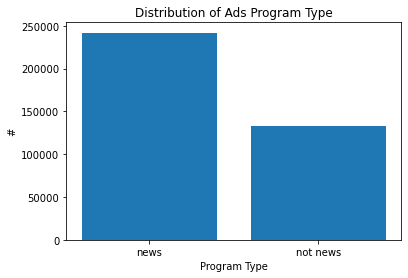

In [13]:
#bar chart for program type distribution 
program_type=ads_df["program_type"].value_counts(dropna=False)
df=pd.DataFrame({'Program_Type':program_type.index, 'Count':program_type.values})
plt.bar(df.Program_Type, df.Count)
plt.xlabel("Program Type")
plt.ylabel("#")
plt.title('Distribution of Ads Program Type')
plt.show()

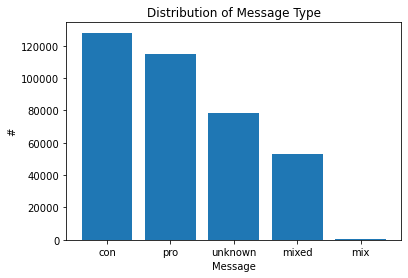

In [14]:
#bar chart for message distribution 
message=ads_df["message"].value_counts(dropna=False)
df=pd.DataFrame({'Message':message.index, 'Count':message.values})
plt.bar(df.Message, df.Count)
plt.xlabel("Message")
plt.ylabel("#")
plt.title('Distribution of Message Type')
plt.show()

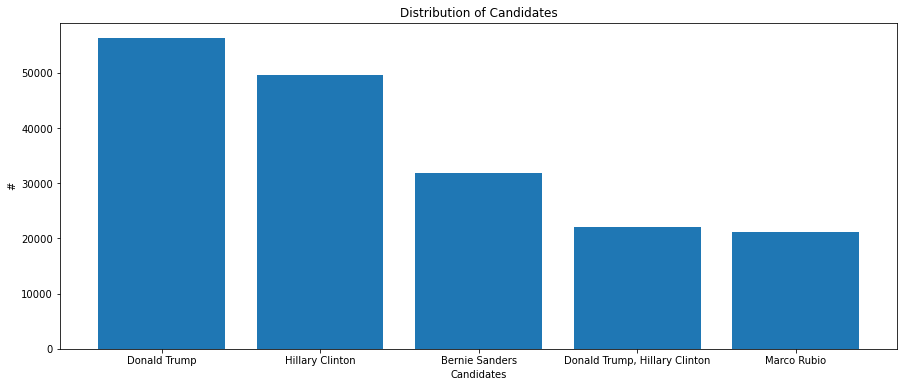

In [51]:
#bar chart for candidate distribution 
candidate=ads_df['candidates'].value_counts(dropna=True).head(5)
df=pd.DataFrame({'Candidates':candidate.index, 'Count':candidate.values})
plt.figure(figsize=(15,6))
plt.bar(df.Candidates, df.Count)
plt.xlabel("Candidates")
plt.ylabel("#")
plt.title('Distribution of Candidates')
plt.show()

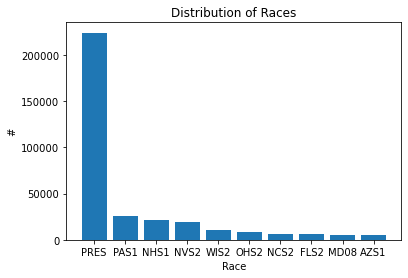

In [55]:
#bar chart for race distribution
race=ads_df['race'].value_counts(dropna=True).head(10)
df=pd.DataFrame({'Race':race.index, 'Count':race.values})
plt.bar(df.Race, df.Count)
plt.xlabel("Race")
plt.ylabel("#")
plt.title('Distribution of Races')
plt.show()

In [ ]:
# Learn more about location column

ads_df['location'] = ads_df['location'].astype('string') 

ads_df['location'].dtypes

In [ ]:
ads_df['location'].value_counts(dropna = False)

In [ ]:
# Capture unique values from location column

unique_locations = ads_df['location'].unique()

unique_locations

In [ ]:
# Extract states from unique location values & create dictionary to translate
# *** Note that missing values are set as "nan" ***

state_postal_codes = []

for location in unique_locations:
    if isinstance(location, str):
        split_strs = location.split(',')
        state = split_strs[-1]
        state = state.strip()
        state_postal_codes.append(state)
    else:
        state_postal_codes.append("nan")
    
for i in range(len(state_postal_codes)):
    if state_postal_codes[i] == "Ohio":
        state_postal_codes[i] = "OH"
    elif state_postal_codes[i] == "Iowa":
        state_postal_codes[i] = "IA"

mapping_locations_to_state = {}

for i in range(len(state_postal_codes)):
    mapping_locations_to_state[unique_locations[i]] = state_postal_codes[i]
    
mapping_locations_to_state

In [ ]:
# Create new df column of state codes

states_df = ads_df['location'].replace(mapping_locations_to_state)

states_df.rename("state", inplace = True)

In [ ]:
# Add state codes column to ads_df

ads_df = pd.concat([ads_df, states_df], axis=1)

In [ ]:
ads_df.head(10)

In [ ]:
print(ads_df.shape)
print(ads_df.head())
print(ads_df.describe())
types = ads_df.dtypes
print(ads_df)
ads_df.describe()

In [ ]:
# Output cleaned .csv file
# Note that we can keep adding steps in this workbook to improve on the cleaned file

ads_df.to_csv("political_tv_ad_archive_CLEANED.csv", index=False)